In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
pd.set_option('display.max_columns',None)

In [87]:
df=pd.read_excel("C:\\Users\\Priyesh\\Downloads\\Pumpkin_Seeds\\Pumpkin_Seeds_Dataset\\Pumpkin_Seeds_Dataset.xlsx",header=0,index_col=None)

In [88]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [89]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [90]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool

In [91]:
duplicate_rows = df[df.duplicated()]

In [92]:
print(duplicate_rows)

Empty DataFrame
Columns: [Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area, Equiv_Diameter, Eccentricity, Solidity, Extent, Roundness, Aspect_Ration, Compactness, Class]
Index: []


In [93]:
df.shape

(2500, 13)

In [94]:
df.describe(include = 'all')

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Çerçevelik
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1300
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121,NaN
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067,NaN
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800,NaN
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475,NaN
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700,NaN
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500,NaN


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [96]:
df_u = df[df.Class == 'Ürgüp Sivrisi']
df_c = df[df.Class == 'Çerçevelik']
print('Çerçevelik:',df_c.shape,'\nÜrgüp Sivrisi:',df_u.shape)

Çerçevelik: (1300, 13) 
Ürgüp Sivrisi: (1200, 13)


Checking Class Balance

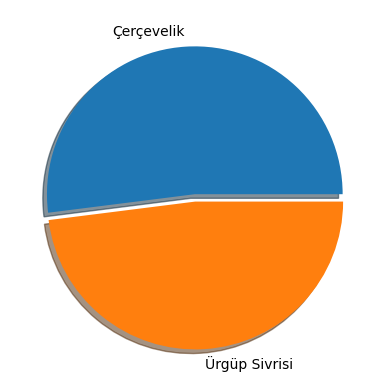

In [97]:
plt.pie([df_c.shape[0],df_u.shape[0]],labels=['Çerçevelik','Ürgüp Sivrisi'],
        explode = [0,0.05], shadow = True
       )
plt.show()

In [98]:
df.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object

<Axes: >

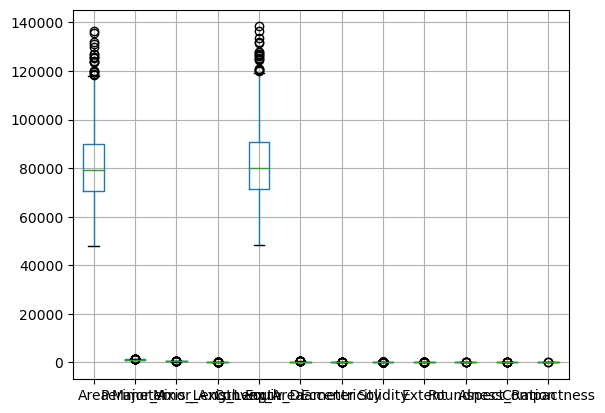

In [99]:
df.boxplot()

                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.928548           0.789133           0.685304   
Perimeter          0.928548   1.000000           0.946181           0.392913   
Major_Axis_Length  0.789133   0.946181           1.000000           0.099376   
Minor_Axis_Length  0.685304   0.392913           0.099376           1.000000   
Convex_Area        0.999806   0.929971           0.789061           0.685634   
Equiv_Diameter     0.998464   0.928055           0.787078           0.690020   
Eccentricity       0.159624   0.464601           0.704287          -0.590877   
Solidity           0.158388   0.065340           0.119291           0.090915   
Extent            -0.014018  -0.140600          -0.214990           0.233576   
Roundness         -0.149378  -0.500968          -0.684972           0.558566   
Aspect_Ration      0.159960   0.487880           0.729156          -0.598475   
Compactness       -0.160438  -0.484440  

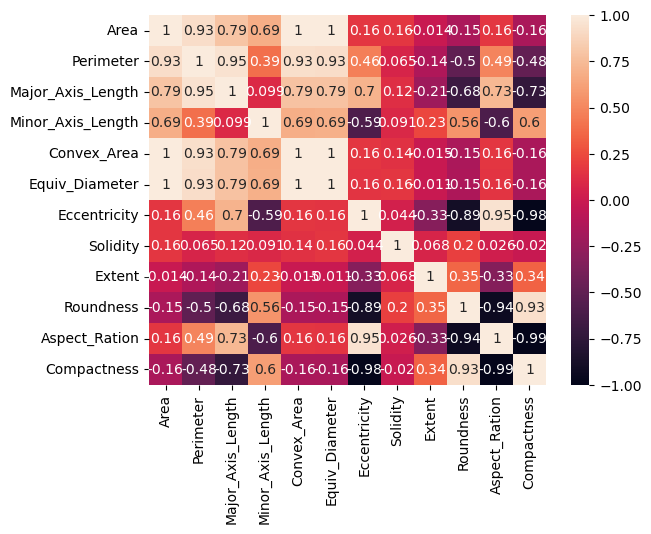

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['number'])


corr_df = numeric_columns.corr(method='pearson')
print(corr_df)


sns.heatmap(corr_df, vmin=-1.0, vmax=1.0, annot=True)
plt.show()


Renaming the class

In [101]:
class_mapping = {'Ürgüp Sivrisi': 'Urgup Sivrisi', 'Cercevelik': 'Cercevelik'}
df['Class'] = df['Class'].replace(class_mapping)

Label Encoding

In [102]:
colname=[]
for x in df.columns:
    if df[x].dtypes == 'object':
        colname.append(x)
colname

['Class']

In [103]:
le=LabelEncoder()

for x in colname:
    df[x]=le.fit_transform(df[x])

In [104]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,1
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,1
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,1
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,1
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,1


Dividing Dependent(Y) & Independent(X) Variable

In [105]:
X= df.values[:,0:-1]
Y= df.values[:,-1]

In [106]:
X

array([[5.627600e+04, 8.882420e+02, 3.261485e+02, ..., 8.963000e-01,
        1.480900e+00, 8.207000e-01],
       [7.663100e+04, 1.068146e+03, 4.171932e+02, ..., 8.440000e-01,
        1.781100e+00, 7.487000e-01],
       [7.162300e+04, 1.082987e+03, 4.358328e+02, ..., 7.674000e-01,
        2.065100e+00, 6.929000e-01],
       ...,
       [8.799400e+04, 1.210314e+03, 5.072200e+02, ..., 7.549000e-01,
        2.282800e+00, 6.599000e-01],
       [8.001100e+04, 1.182947e+03, 5.019065e+02, ..., 7.185000e-01,
        2.451300e+00, 6.359000e-01],
       [8.493400e+04, 1.159933e+03, 4.628951e+02, ..., 7.933000e-01,
        1.973500e+00, 7.104000e-01]])

In [107]:
X.shape

(2500, 12)

In [108]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [109]:
Y.shape

(2500,)

In [110]:
scaler= StandardScaler()
scaler.fit(X) 
X= scaler.transform(X)

In [111]:
print(X)

[[-1.78470346 -2.21575484 -2.32022415 ...  1.8737626  -1.77506344
   2.19727996]
 [-0.29478016 -0.56880361 -0.70091635 ...  0.93837685 -0.82486401
   0.84023019]
 [-0.66135033 -0.43294002 -0.36939513 ... -0.43161453  0.07405883
  -0.21148339]
 ...
 [ 0.53695644  0.7326892   0.90028724 ... -0.65517709  0.76312751
  -0.83346454]
 [-0.04737457  0.48215494  0.8057821  ... -1.30619127  1.29646729
  -1.28581446]
 [ 0.31297387  0.27147071  0.11193101 ...  0.0316071  -0.21587543
   0.1183551 ]]


In [112]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3,
                                                  random_state=10)

In [113]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1750, 12)
(750, 12)
(1750,)
(750,)


Genrating & Training Model

Model 1. Decision Tree

In [114]:
model_DecisionTree= DecisionTreeClassifier( criterion= 'gini',
                                          random_state= 10)

model_DecisionTree.fit(X_train, Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm= confusion_matrix(Y_test, Y_pred)   
print(cfm)
print('Classification Report :')
print(classification_report(Y_test, Y_pred))
acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of The Model :", acc)

[[299  59]
 [ 68 324]]
Classification Report :
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82       358
         1.0       0.85      0.83      0.84       392

    accuracy                           0.83       750
   macro avg       0.83      0.83      0.83       750
weighted avg       0.83      0.83      0.83       750

Accuracy of The Model : 0.8306666666666667


In [116]:
feature_imp= pd.DataFrame()
feature_imp['Features']= df.columns[:-1]
feature_imp['Importance']=model_DecisionTree.feature_importances_
feature_imp.sort_values('Importance', ascending=False)

,Features,Importance
10,Aspect_Ration,0.577200
7,Solidity,0.071137
6,Eccentricity,0.058880
8,Extent,0.057424
2,Major_Axis_Length,0.056784
11,Compactness,0.049388
9,Roundness,0.031008
1,Perimeter,0.030152
3,Minor_Axis_Length,0.026283
5,Equiv_Diameter,0.020579


In [117]:
df.drop(['Convex_Area','Eccentricity','Equiv_Diameter','Perimeter'], axis=1,inplace= True)

In [118]:
df.head()

,Area,Major_Axis_Length,Minor_Axis_Length,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,326.1485,220.2388,0.9902,0.7453,0.8963,1.4809,0.8207,1
1,76631,417.1932,234.2289,0.9916,0.7151,0.8440,1.7811,0.7487,1
2,71623,435.8328,211.0457,0.9857,0.7400,0.7674,2.0651,0.6929,1
3,66458,381.5638,222.5322,0.9902,0.7396,0.8486,1.7146,0.7624,1
4,66107,383.8883,220.4545,0.9850,0.6752,0.8338,1.7413,0.7557,1


Pruning DT

In [119]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree= DecisionTreeClassifier( criterion= 'gini',
                                          random_state= 10,
                                          min_samples_leaf=3,
                                          min_samples_split=5,
                                          max_features=6)
# fit the model on the data and predict the values
model_DecisionTree.fit(X_train, Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm= confusion_matrix(Y_test, Y_pred)   
print(cfm)
print('Classification Report :')
print(classification_report(Y_test, Y_pred))
acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of The Model :", acc)

[[292  66]
 [ 49 343]]
Classification Report :
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       358
         1.0       0.84      0.88      0.86       392

    accuracy                           0.85       750
   macro avg       0.85      0.85      0.85       750
weighted avg       0.85      0.85      0.85       750

Accuracy of The Model : 0.8466666666666667


Model 2. Logistic Regression

In [121]:
classifier= LogisticRegression()
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)
print(Y_pred)

[1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.

In [122]:
cfm= confusion_matrix(Y_test, Y_pred)  
print(cfm)
print('Classification Report :')
print(classification_report(Y_test, Y_pred))
acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of The Model :", acc)

[[295  63]
 [ 30 362]]
Classification Report :
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       358
         1.0       0.85      0.92      0.89       392

    accuracy                           0.88       750
   macro avg       0.88      0.87      0.88       750
weighted avg       0.88      0.88      0.88       750

Accuracy of The Model : 0.876


Tuning Model (Dedicated Tuning)

In [123]:
y_pred_prob= classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.45459926 0.54540074]
 [0.14587025 0.85412975]
 [0.07697893 0.92302107]
 ...
 [0.17702819 0.82297181]
 [0.99660661 0.00339339]
 [0.96283729 0.03716271]]


In [124]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 98  , type 2 error : 23  , type 1 error: 75
Errors at threshold  0.41000000000000003 : 98  , type 2 error : 23  , type 1 error: 75
Errors at threshold  0.42000000000000004 : 98  , type 2 error : 23  , type 1 error: 75
Errors at threshold  0.43000000000000005 : 99  , type 2 error : 24  , type 1 error: 75
Errors at threshold  0.44000000000000006 : 96  , type 2 error : 25  , type 1 error: 71
Errors at threshold  0.45000000000000007 : 97  , type 2 error : 27  , type 1 error: 70
Errors at threshold  0.4600000000000001 : 98  , type 2 error : 28  , type 1 error: 70
Errors at threshold  0.4700000000000001 : 96  , type 2 error : 28  , type 1 error: 68
Errors at threshold  0.4800000000000001 : 95  , type 2 error : 29  , type 1 error: 66
Errors at threshold  0.4900000000000001 : 95  , type 2 error : 30  , type 1 error: 65
Errors at threshold  0.5000000000000001 : 93  , type 2 error : 30  , type 1 error: 63
Errors at threshold  0.5100000000000001 : 96  , type 2 error : 3

In [125]:
# Choosing the best
y_pred_class=[]

for i in y_pred_prob[:,1]:
    if i > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm= confusion_matrix(Y_test, y_pred_class)  
print(cfm)
print('Classification Report :')
print(classification_report(Y_test, y_pred_class))
acc= accuracy_score(Y_test, y_pred_class)
print("Accuracy of The Model :", acc)

[[295  63]
 [ 30 362]]
Classification Report :
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       358
         1.0       0.85      0.92      0.89       392

    accuracy                           0.88       750
   macro avg       0.88      0.87      0.88       750
weighted avg       0.88      0.88      0.88       750

Accuracy of The Model : 0.876


Model 3. Random Forest

In [127]:
model_RandomForest= RandomForestClassifier(n_estimators=100,
                                          random_state=10, bootstrap= True)
# fit the model on the data and prediction the values
model_RandomForest.fit(X_train, Y_train)
Y_pred= model_RandomForest.predict(X_test)

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm= confusion_matrix(Y_test, Y_pred)   
print(cfm)
print('Classification Report :')
print(classification_report(Y_test, Y_pred))
acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of The Model :", acc)

[[299  59]
 [ 35 357]]
Classification Report :
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.86       358
         1.0       0.86      0.91      0.88       392

    accuracy                           0.87       750
   macro avg       0.88      0.87      0.87       750
weighted avg       0.88      0.87      0.87       750

Accuracy of The Model : 0.8746666666666667


Tuning the Model (HyperParameters)

In [129]:
from sklearn.ensemble import RandomForestClassifier


model_RandomForest = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  
    random_state=10,
    bootstrap=True
)

# Fit the model on the training data
model_RandomForest.fit(X_train, Y_train)

# Predict the values
Y_pred = model_RandomForest.predict(X_test)


In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm= confusion_matrix(Y_test, Y_pred)   
print(cfm)
print('Classification Report :')
print(classification_report(Y_test, Y_pred))
acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of The Model :", acc)

[[295  63]
 [ 29 363]]
Classification Report :
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.87       358
         1.0       0.85      0.93      0.89       392

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750

Accuracy of The Model : 0.8773333333333333


Best Results Attained

Creating Pickle

In [131]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(model_RandomForest, pickle_out)
pickle_out.close()

Testing Dummy Value

In [132]:

input_data = [[56276, 898.3, 345, 221, 56871, 267.6, 0.7999, 0.9858, 0.7453, 0.9554, 1.5, 0.8520]]
scaled_input_data = scaler.transform(input_data)


predicted_class = model_RandomForest.predict(scaled_input_data)

print('Predicted Class:', int(predicted_class))

Predicted Class: 1


The following code is for deployement on local host use an IDE to form .py file of following code & run in the IDE's Terminal in order to View the stream lit web application on your local server.

In [134]:
import streamlit as st
import pickle
import numpy as np

model = pickle.load(open('classifier.pkl', 'rb'))

def predict_fire_probability(Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area, Equiv_Diameter, Eccentricity, Solidity, Extent, Roundness, Aspect_Ratio, Compactness):
    input_data = np.array([[Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area, Equiv_Diameter, Eccentricity, Solidity, Extent, Roundness, Aspect_Ratio, Compactness]]).astype(np.float64)
    prediction = model.predict_proba(input_data)
    predicted_probability = '{0:.{1}f}'.format(prediction[0][0], 2)
    return float(predicted_probability)

def main():
    st.title("Pumpkin Seed Prediction ML App")
    html_temp = """
    <div style="background-color:#025246;padding:10px">
    <h2 style="color:white;text-align:center;">Pumpkin Seed Prediction ML App</h2>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    Area = st.text_input("Area")
    Perimeter = st.text_input("Perimeter")
    Major_Axis_Length = st.text_input("Major Axis Length")
    Minor_Axis_Length = st.text_input("Minor Axis Length")
    Convex_Area = st.text_input("Convex Area")
    Equiv_Diameter = st.text_input("Equivalent Diameter")
    Eccentricity = st.text_input("Eccentricity")
    Solidity = st.text_input("Solidity")
    Extent = st.text_input("Extent")
    Roundness = st.text_input("Roundness")
    Aspect_Ratio = st.text_input("Aspect Ratio")
    Compactness = st.text_input("Compactness")

    safe_html = """  
      <div style="background-color:#F4D03F;padding:10px >
       <h2 style="color:white;text-align:center;">Seed Type Urgup Sivrisi</h2>
       </div>
    """
    danger_html = """  
      <div style="background-color:#F08080;padding:10px >
       <h2 style="color:black ;text-align:center;">Seed Type- Cercevelik</h2>
       </div>
    """

    if st.button("Predict"):
        output = predict_fire_probability(Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area, Equiv_Diameter, Eccentricity, Solidity, Extent, Roundness, Aspect_Ratio, Compactness)
        st.success('The probability of seed place is'.format(output))

        if output > 0.5:
            st.markdown(danger_html, unsafe_allow_html=True)
        else:
            st.markdown(safe_html, unsafe_allow_html=True)

if __name__ == '__main__':
    main()